## Imports

In [1]:
import pickle
import tensorflow as tf
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib import animation, rc
from IPython.display import HTML
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import numpy as np
from scipy.ndimage.filters import convolve
from PIL import Image

## Loading Datasets

In [2]:
training_dataset_path = "data sets/data.pkl"

def load_data(dataset_path):
    with open(dataset_path, 'rb') as f:
            data = pickle.load(f)
            return data

def get_tensor_dataset():
    all_data = load_data(training_dataset_path)
    
    tf_data_xt = all_data["x_train"][:, 1:]
    tf_data_xv = all_data["x_val"][:, 1:]
    tf_data_yt = all_data["y_train"]
    tf_data_yv = all_data["y_val"]
    
    tf_data_xt = tf.convert_to_tensor(tf_data_xt, dtype=tf.float32)
    tf_data_xv = tf.convert_to_tensor(tf_data_xv, dtype=tf.float32)
    tf_data_yt = tf.convert_to_tensor(tf_data_yt, dtype=tf.float32)
    tf_data_yv = tf.convert_to_tensor(tf_data_yv, dtype=tf.float32)

    tf_data_xt = tf.reshape(tf_data_xt, [500,175,1])
    tf_data_xv = tf.reshape(tf_data_xv, [5900,175,1])
    tf_data_yt = tf.reshape(tf_data_yt, [500,1,1])
    tf_data_yv = tf.reshape(tf_data_yv, [5900,1,1])
    
    return tf_data_xt, tf_data_xv, tf_data_yt, tf_data_yv

## Replace training data and validation data, becouse in this data set there is 5900 examples in val data and only 500 in train data 👀

In [3]:
tf_data_xv, tf_data_xt, tf_data_yv, tf_data_yt = get_tensor_dataset()

## Model Definition

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(175,1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 175)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               22528     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 22,657
Trainable params: 22,657
Non-trainable params: 0
_________________________________________________________________


## Compiling and training model

In [17]:
model.compile(optimizer='Adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(tf_data_xt, tf_data_yt, epochs=6, validation_data=(tf_data_xv, tf_data_yv))  

Epoch 1/6
185/185 [==============================] - 0s 2ms/step - loss: 2.4215e-05 - accuracy: 1.0000 - val_loss: 0.0608 - val_accuracy: 0.9160
Epoch 2/6
185/185 [==============================] - 0s 1ms/step - loss: 5.8619e-06 - accuracy: 1.0000 - val_loss: 0.0552 - val_accuracy: 0.9160
Epoch 3/6
185/185 [==============================] - 0s 1ms/step - loss: 3.2782e-06 - accuracy: 1.0000 - val_loss: 0.0581 - val_accuracy: 0.9100
Epoch 4/6
185/185 [==============================] - 0s 1ms/step - loss: 2.3495e-06 - accuracy: 1.0000 - val_loss: 0.0487 - val_accuracy: 0.9280
Epoch 5/6
185/185 [==============================] - 0s 1ms/step - loss: 1.5979e-06 - accuracy: 1.0000 - val_loss: 0.0570 - val_accuracy: 0.9140
Epoch 6/6
185/185 [==============================] - 0s 1ms/step - loss: 1.1998e-06 - accuracy: 1.0000 - val_loss: 0.0554 - val_accuracy: 0.9180


In [18]:
test_loss, test_acc = model.evaluate(tf_data_xv,  tf_data_yv, verbose=1) 
print('Val accuracy:', test_acc)

16/16 [==============================] - 0s 938us/step - loss: 0.0554 - accuracy: 0.9180
Val accuracy: 0.9179999828338623


In [19]:
model.save('data sets/model 1')
# new_model = tf.keras.models.load_model('data sets/model1')

INFO:tensorflow:Assets written to: data sets/model 1\assets


## Testing This Neural Network Model On JPG

In [20]:
def get_prediction(cut_image):
    arr = tf.convert_to_tensor(cut_image, dtype=tf.float32)
    arr = tf.reshape(cut_image, [1,175,1])
    res = model.predict(arr, verbose = 0)
    print(res)
    return res > 0.4

C:\Users\Wasilewski\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[[7.548637e-06]]
[[7.548637e-06]]
[[7.548637e-06]]
[[1.373916e-05]]
[[0.00044188]]
[[1.5933786e-06]]
[[7.550237e-09]]
[[4.4290878e-06]]
[[0.00188814]]
[[1.7271695e-06]]
[[7.744369e-07]]
[[0.0006911]]
[[6.2306055e-05]]
[[5.822732e-05]]
[[4.8525504e-05]]
[[2.1250112e-06]]
[[7.3940546e-06]]
[[1.1110705e-07]]
[[5.618194e-06]]
[[0.00020195]]
[[8.267307e-07]]
[[1.3431257e-06]]
[[1.834634e-05]]
[[1.295791e-06]]
[[4.4167546e-06]]
[[4.3683103e-05]]
[[0.00087839]]
[[4.755039e-07]]
[[1.4083353e-09]]
[[0.0037172]]
[[0.9743009]]
[[4.2655773e-07]]
[[1.7141106e-08]]
[[0.00034408]]
[[2.7681472e-05]]
[[5.8796737e-05]]
[[0.0001751]]
[[2.2618513e-05]]
[[4.834666e-06]]
[[1.6440738e-07]]
[[4.7590083e-06]]
[[0.00708587]]
[[2.7589314e-05]]
[[6.0000036e-07]]
[[8.330072e-06]]
[[1.920233e-06]]
[[4.7195652e-05]]
[[3.153498e-05]]
[[9.248787e-05]]
[[4.967087e-07]]
[[1.2627758e-08]]
[[0.00048962]]
[[0.9849818]]
[[2.5109282e-06]]
[[1.3760846e-08]]
[[5.5289165e-05]]
[[1.97901e-05]]
[[0.00072395]]
[[0.00011239]]
[[1.3

KeyboardInterrupt: 

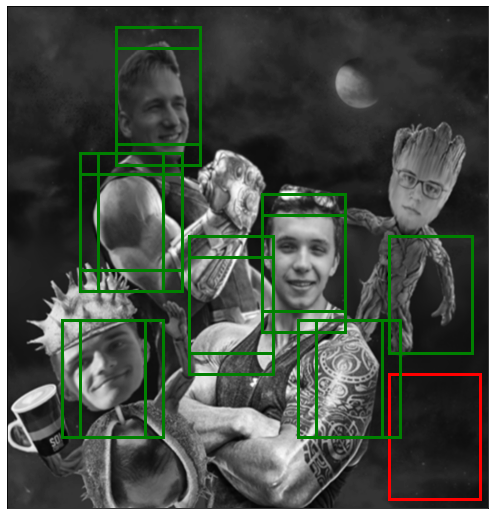

In [21]:
%matplotlib inline
from datetime import datetime
config = tf.compat.v1.ConfigProto(gpu_options =
                                  tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
                                  # device_count = {'GPU': 1}
                                  )
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)
timess = list()

def hog(image):
    nwin_x = 5
    nwin_y = 5
    B = 7
    (L, C) = np.shape(image)
    H = np.zeros(shape=(nwin_x * nwin_y * B, 1))
    m = np.sqrt(L / 2.0)
    if C is 1:
        raise NotImplementedError
    step_x = np.floor(C / (nwin_x + 1))
    step_y = np.floor(L / (nwin_y + 1))
    cont = 0
    hx = np.array([[1, 0, -1]])
    hy = np.array([[-1], [0], [1]])
    grad_xr = convolve(image, hx, mode='constant', cval=0.0)
    grad_yu = convolve(image, hy, mode='constant', cval=0.0)
    angles = np.arctan2(grad_yu, grad_xr)
    magnit = np.sqrt((grad_yu ** 2 + grad_xr ** 2))
    for n in range(nwin_y):
        for m in range(nwin_x):
            cont += 1
            angles2 = angles[int(n * step_y):int((n + 2) * step_y),
                      int(m * step_x):int((m + 2) * step_x)]
            magnit2 = magnit[int(n * step_y):int((n + 2) * step_y),
                      int(m * step_x):int((m + 2) * step_x)]
            v_angles = angles2.ravel()
            v_magnit = magnit2.ravel()
            bin = 0
            H2 = np.zeros(shape=(B, 1))

            for ang_lim in np.arange(start=-np.pi + 2 * np.pi / B,
                                     stop=np.pi + 2 * np.pi / B,
                                     step=2 * np.pi / B):
                check = v_angles < ang_lim
                v_angles = (v_angles * (~check)) + (check) * 100
                H2[bin] += np.sum(v_magnit * check)
                bin += 1

            H2 = H2 / (np.linalg.norm(H2) + 0.01)
            H[(cont - 1) * B:cont * B] = H2
    return H


def face_detect_patch(patch, model):
    patch = patch / 255.0
    hog_patch = hog(patch)
    res = get_prediction(hog_patch)
    timess.append(datetime.now())
    return res


def get_patch(img, x, y):
    x1, x2 = x, x + PATCH_WIDTH
    y1, y2 = y, y + PATCH_HEIGHT
    return img[y1: y2, x1: x2]


def animate(i, ax, patch, patch_positions, img, model):
    markers = []
    for position in marker_positions:
        markers.append(patches.Rectangle(position, PATCH_WIDTH, PATCH_HEIGHT, fill=False, color='g',linewidth=3))

    for marker in markers:
        ax.add_patch(marker)
    if i > len(patch_positions) - 1:
        return [patch] + markers

    img_size = img.shape
    x, y = patch_positions[i]
    patch.set_xy([x, img_size[0] - PATCH_HEIGHT - y])

    cut_out = get_patch(img, x, y)
    
    if face_detect_patch(cut_out, model):
        marker_position = [x, img_size[0] - PATCH_HEIGHT - y]
        marker_positions.append(marker_position)
        marker = patches.Rectangle(marker_position, PATCH_WIDTH, PATCH_HEIGHT, fill=False,
                                   color='g', linewidth=3)
        ax.add_patch(marker)
        markers.append(marker)

    return [patch] + markers


def slided_window(path_to_img):
    # img = mpimg.imread('image2017.jpg')
    img = mpimg.imread('data sets/exlpf.jpg')
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    img = 0.2989 * r + 0.5870 * g + 0.1140 * b
    plt.rcParams['image.cmap'] = 'gray'
    plt.rcParams['image.interpolation'] = 'none'
    #fig = plt.figure(figsize=(7.5, 4.23))
    fig = plt.figure(figsize=(7.5, 7.5))
    plt.axis('equal')
    plt.tight_layout()
    ax = fig.add_subplot(111)
    ax.set_xlim(0, img.shape[1])
    ax.set_ylim(0, img.shape[0])
    ax.xaxis.set_tick_params(labelbottom=False, labeltop=False, top=False, bottom=False)
    ax.yaxis.set_tick_params(left=False, labelleft=False)

    patch = patches.Rectangle((PATCH_WIDTH, PATCH_HEIGHT), 100, 120, fill=False, color='r',
                              linewidth=3)

    ax.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]], aspect='auto',
              interpolation="bicubic")
    ax.add_patch(patch)
    patch_positions = []

    for y in range(0, img.shape[0] - PATCH_HEIGHT, STEP):
        for x in range(0, img.shape[1] - PATCH_WIDTH, STEP):
            patch_positions.append([x, y])
    model = 111
    fargs = [ax, patch, patch_positions, img, model]
    anim = animation.FuncAnimation(fig, animate,
                                   fargs=fargs,
                                   # init_func=self.initialize_animation,
                                   frames=500,
                                   interval=20,
                                   blit=True, repeat=False)
    HTML(anim.to_html5_video())
    anim._repr_html_() is None
    rc('animation', html='html5')
    return anim
    #plt.draw()
    
PATCH_WIDTH = 92
PATCH_HEIGHT = 112  
STEP = 20
marker_positions = []
slided_window('data sets/exlpf.jpg')    

In [14]:
for ii in range(len(timess) - 1):
    print((timess[ii+1] - timess[ii]))

0:00:00.095086
0:00:00.018016
0:00:00.115105
0:00:00.117107
0:00:00.115104
0:00:00.114103
0:00:00.114104
0:00:00.113102
0:00:00.115105
0:00:00.116105
0:00:00.112102
0:00:00.113103
0:00:00.113102
0:00:00.112102
0:00:00.115105
0:00:00.115104
0:00:00.115104
0:00:00.112606
0:00:00.114104
0:00:00.113103
0:00:00.114103
0:00:00.114104
0:00:00.113102
0:00:00.113103
0:00:00.115104
0:00:00.112102
0:00:00.113103
0:00:00.115104
0:00:00.177162
0:00:00.113101
0:00:00.115105
0:00:00.114103
0:00:00.116106
0:00:00.117106
0:00:00.114609
0:00:00.113102
0:00:00.115104
0:00:00.115105
0:00:00.114103
0:00:00.117107
0:00:00.115104
0:00:00.115104
0:00:00.115105
0:00:00.115105
0:00:00.119108
0:00:00.118107
0:00:00.116105
0:00:00.116105
0:00:00.118107
0:00:00.118108
0:00:00.116105
0:00:00.119108
0:00:00.118107
0:00:00.119108
0:00:00.119108
0:00:00.117107
0:00:00.122110
0:00:00.120110
0:00:00.119107
0:00:00.119109
0:00:00.120109
0:00:00.122111
0:00:00.123111
0:00:00.120109
0:00:00.124113
0:00:00.123111
0:00:00.12